## Pandas.Series

In [1]:
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
1.26.4
2.2.2


In [2]:
pd.Series

pandas.core.series.Series

In [3]:
grades = pd.Series([88,78,92,93,90], name='midterm')

In [4]:
grades

0    88
1    78
2    92
3    93
4    90
Name: midterm, dtype: int64

In [5]:
grades.values

array([88, 78, 92, 93, 90])

In [6]:
grades = grades + 1
grades

0    89
1    79
2    93
3    94
4    91
Name: midterm, dtype: int64

In [7]:
grades >= 90

0    False
1    False
2     True
3     True
4     True
Name: midterm, dtype: bool

In [8]:
grades

0    89
1    79
2    93
3    94
4    91
Name: midterm, dtype: int64

In [9]:
grades.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
grades.index = pd.Index(['Ben', 'May', 'Sue', "Beth", 'Richard'], name = 'student')

In [11]:
grades

student
Ben        89
May        79
Sue        93
Beth       94
Richard    91
Name: midterm, dtype: int64

In [12]:
grades['Ben']

89

In [13]:
grades[['Ben','May']]

student
Ben    89
May    79
Name: midterm, dtype: int64

In [14]:
grades[grades>=90]

student
Sue        93
Beth       94
Richard    91
Name: midterm, dtype: int64

Text(0.5, 1.0, 'Midterm Grades')

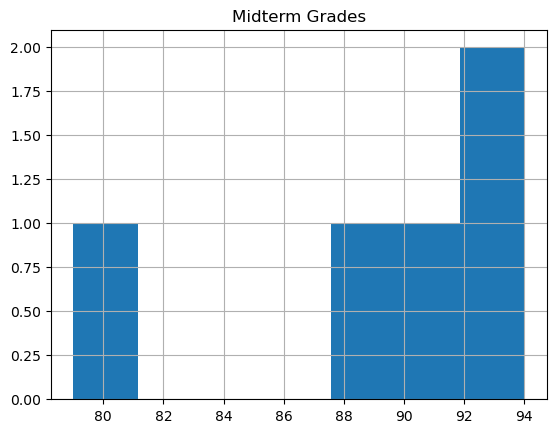

In [18]:
grades.hist(bins=7)
plt.title('Midterm Grades')

In [19]:
# dataFrames

In [20]:
grades1 = pd.Series([88,78,92,56,79,92])
grades2 = pd.Series([84,81,50,84,90,78])
grades1.index = pd.Index(['Ben','May','Sue','Blake','Amy','Steve'], name = 'student')
grades2.index = grades1.index

In [22]:
grades2

student
Ben      84
May      81
Sue      50
Blake    84
Amy      90
Steve    78
dtype: int64

In [24]:
gradebook = pd.DataFrame([grades1,grades2]).T
gradebook

,0,1
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


In [27]:
gradebook.columns = ['midterm','final']
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


In [29]:
gradebook = pd.DataFrame({'midterm': grades1, 'final':grades2}, columns=['midterm','final'])
gradebook

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50
Blake,56,84
Amy,79,90
Steve,92,78


In [31]:
gradebook.head(3)

,midterm,final
student,,
Ben,88,84
May,78,81
Sue,92,50


In [33]:
type(gradebook['midterm'])

pandas.core.series.Series

In [34]:
gradebook.midterm

student
Ben      88
May      78
Sue      92
Blake    56
Amy      79
Steve    92
Name: midterm, dtype: int64

In [37]:
gradebook.loc['Ben']

midterm    88
final      84
Name: Ben, dtype: int64

In [39]:
gradebook.final = gradebook.final + 1
gradebook

,midterm,final
student,,
Ben,88,86
May,78,83
Sue,92,52
Blake,56,86
Amy,79,92
Steve,92,80


In [40]:
gradebook['homework'] = [90] * 6

In [41]:
gradebook

,midterm,final,homework
student,,,
Ben,88,86,90
May,78,83,90
Sue,92,52,90
Blake,56,86,90
Amy,79,92,90
Steve,92,80,90


In [42]:
del gradebook['homework']
gradebook

,midterm,final
student,,
Ben,88,86
May,78,83
Sue,92,52
Blake,56,86
Amy,79,92
Steve,92,80


In [43]:
gradebook.drop('final', axis = 1)

,midterm
student,
Ben,88
May,78
Sue,92
Blake,56
Amy,79
Steve,92


In [44]:
gradebook

,midterm,final
student,,
Ben,88,86
May,78,83
Sue,92,52
Blake,56,86
Amy,79,92
Steve,92,80


In [45]:
gradebook.drop('Ben', axis=0)

,midterm,final
student,,
May,78,83
Sue,92,52
Blake,56,86
Amy,79,92
Steve,92,80


Text(0.5, 1.0, 'Midterm and Final')

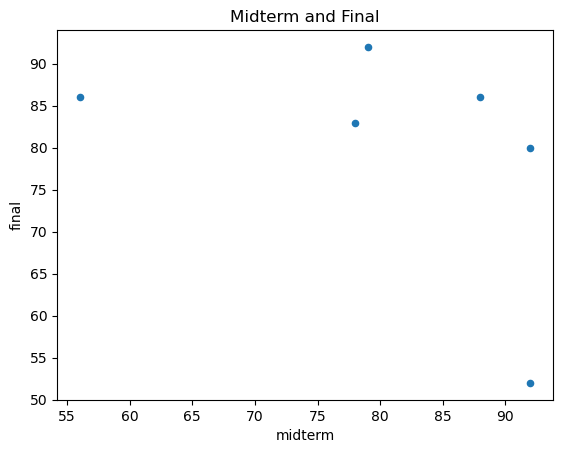

In [46]:
gradebook.plot.scatter(x='midterm', y = 'final')
plt.title("Midterm and Final")

In [47]:
gradebook.to_csv("gradebook.csv")

In [48]:
# bracket indexing in pandas

In [52]:
# Indexing with a series
treats = pd.Series( [x*2 for x in range(5)], index = ['mouse_{}'.format(x) for x in range(5)])
treats

mouse_0    0
mouse_1    2
mouse_2    4
mouse_3    6
mouse_4    8
dtype: int64

In [53]:
treats[1]

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_42926/2336096308.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  treats[1]


2

In [54]:
treats[['mouse_1', 'mouse_4']]

mouse_1    2
mouse_4    8
dtype: int64

In [56]:
treats[treats>3]

mouse_2    4
mouse_3    6
mouse_4    8
dtype: int64

In [57]:
treats[1:3]

mouse_1    2
mouse_2    4
dtype: int64

In [58]:
treats['mouse_1': 'mouse_3']

mouse_1    2
mouse_2    4
mouse_3    6
dtype: int64

In [59]:
# Simple indexing with a DF
np.random.seed(200)
Mice = pd.DataFrame(np.random.geometric(.2, size = (5,5)),
                    columns= ['test_{}'.format(x) for x in range(5)],
                    index= ['mouse_{}'.format(x) for x in range(5)])
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [60]:
Mice['test_1']

mouse_0     2
mouse_1     2
mouse_2    20
mouse_3     7
mouse_4     4
Name: test_1, dtype: int64

In [61]:
Mice.test_1

mouse_0     2
mouse_1     2
mouse_2    20
mouse_3     7
mouse_4     4
Name: test_1, dtype: int64

In [62]:
Mice[['test_1','test_4']]

,test_1,test_4
mouse_0,2,7
mouse_1,2,18
mouse_2,20,9
mouse_3,7,13
mouse_4,4,3


In [63]:
Mice.test_1 > 3

mouse_0    False
mouse_1    False
mouse_2     True
mouse_3     True
mouse_4     True
Name: test_1, dtype: bool

In [64]:
Mice[Mice.test_1 > 3]

,test_0,test_1,test_2,test_3,test_4
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [65]:
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [66]:
Mice > 15

,test_0,test_1,test_2,test_3,test_4
mouse_0,False,False,False,False,False
mouse_1,False,False,False,False,True
mouse_2,False,True,False,False,False
mouse_3,False,False,False,False,False
mouse_4,False,False,False,False,False


In [68]:
Mice[Mice > 15] = 15
Mice


,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15
mouse_2,10,15,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [69]:
Mice[0:2]

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15


In [70]:
Mice['mouse_0':'mouse_2']

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,15
mouse_2,10,15,12,2,9


In [72]:
# loc and iloc
#  - ix-- hard to predict based on position or label
    # now deprecated
#  - loc and iloc  -- allows explicit use of label vs integer position

In [73]:
np.random.seed(200)
Mice = pd.DataFrame(np.random.geometric(.2, size = (5,5)),
                    columns= ['test_{}'.format(x) for x in range(5)],
                    index= ['mouse_{}'.format(x) for x in range(5)])
Mice

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13
mouse_4,8,4,10,4,3


In [75]:
Mice.loc['mouse_2', 'test_2']

12

In [76]:
Mice.iloc[2,2]

12

In [77]:
Mice.loc[['mouse_2','mouse_4'], 'test_2']

mouse_2    12
mouse_4    10
Name: test_2, dtype: int64

In [78]:
Mice.loc[['mouse_2','mouse_4'], 'test_1':'test_3']

,test_1,test_2,test_3
mouse_2,20,12,2
mouse_4,4,10,4


In [79]:
Mice.test_1 > 5

mouse_0    False
mouse_1    False
mouse_2     True
mouse_3     True
mouse_4    False
Name: test_1, dtype: bool

In [80]:
Mice.loc[Mice.test_1 > 5, 'test_1':'test_3']

,test_1,test_2,test_3
mouse_2,20,12,2
mouse_3,7,2,1


In [81]:
Mice.iloc[:4,:]

,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_1,1,2,11,3,18
mouse_2,10,20,12,2,9
mouse_3,1,7,2,1,13


In [82]:
Mice.iloc[:4,:][Mice.test_0>2]

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_42926/1385325557.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Mice.iloc[:4,:][Mice.test_0>2]


,test_0,test_1,test_2,test_3,test_4
mouse_0,14,2,5,3,7
mouse_2,10,20,12,2,9


In [84]:
# Note about integer indexes
s = pd.Series(range(5), index=range(5,0,-1))
s

5    0
4    1
3    2
2    3
1    4
dtype: int64

In [85]:
s[1]

4

In [86]:
s[1:3]

4    1
3    2
dtype: int64

In [87]:
s.loc[3:1]

3    2
2    3
1    4
dtype: int64

In [88]:
s.iloc[1:3]

4    1
3    2
dtype: int64

In [89]:
# applying functions to DFs